In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url =("https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv")
Easy_Visa = pd.read_csv(url)


In [6]:
Easy_Visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:


def load_eda(Easy_Visa, target_col=None, handle_outliers=True):
  
    #  LOAD DATA 
    print("LOADING DATASET ")
    try:
        df = pd.read_csv(Easy_Visa)
        print(f" Dataset loaded successfully. Shape: {df.shape}\n")
    except Exception as e:
        print(f" Error loading dataset: {e}")
        return None

    #  BASIC INFORMATION 
    print(" BASIC INFORMATION ")
    print(df.info())
    print("\n FIRST 5 ROWS ")
    print(df.head())
    print("\n SUMMARY STATISTICS ")
    print(df.describe(include='all').T)

    #  CHECK MISSING VALUES 
    print("\n MISSING VALUES ")
    missing = df.isnull().sum()
    print(missing[missing > 0].sort_values(ascending=False) if missing.sum() > 0 else "No missing values found.")

    #  CHECK DUPLICATES 
    dup_count = df.duplicated().sum()
    print(f"\nDuplicate rows: {dup_count}")

    #  TASK 2.1: FEATURE DISTRIBUTIONS 
    print("\n TASK 2.1: FEATURE & TARGET DISTRIBUTIONS ")
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

    #  Numerical features 
    if num_cols:
        df[num_cols].hist(figsize=(14, 10), bins=20, edgecolor='black')
        plt.suptitle("Distribution of Numerical Features", fontsize=14)
        plt.show()

    #  Categorical features 
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df, palette='Set3')
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

    #  Target variable 
    if target_col and target_col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=target_col, data=df, palette='Set2')
        plt.title(f"Distribution of Target Variable: {target_col}")
        plt.show()

    #  2.2: RELATIONSHIPS BETWEEN FEATURES AND TARGET 
    if target_col and target_col in df.columns:
        print("\n TASK 2.2: RELATIONSHIPS WITH TARGET ")
        
        # Numeric vs Target
        for col in num_cols:
            if col != target_col:
                plt.figure(figsize=(6,4))
                sns.boxplot(x=target_col, y=col, data=df, palette='coolwarm')
                plt.title(f"Boxplot of {col} by {target_col}")
                plt.show()

        # Categorical vs Target
        for col in cat_cols:
            plt.figure(figsize=(6,4))
            sns.countplot(x=col, hue=target_col, data=df, palette='Set2')
            plt.title(f"{col} vs {target_col}")
            plt.xticks(rotation=45)
            plt.show()
    else:
        print("\nNo target variable specified for relationship analysis.")

    #  TASK 2.3: OUTLIER DETECTION & HANDLING 
    if handle_outliers and num_cols:
        print("\n TASK 2.3: OUTLIER DETECTION & HANDLING ")
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            outliers = ((df[col] < lower) | (df[col] > upper)).sum()

            plt.figure(figsize=(6,4))
            sns.boxplot(x=df[col], color='skyblue')
            plt.title(f"Outlier Detection for {col} ({outliers} outliers)")
            plt.show()

            if outliers > 0:
                print(f"{col}: {outliers} outliers found.")
                df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))

    print("\n EDA Completed Successfully!")
    return df


=== LOADING DATASET ===
 Dataset loaded successfully. Shape: (25480, 12)

 BASIC INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None

 

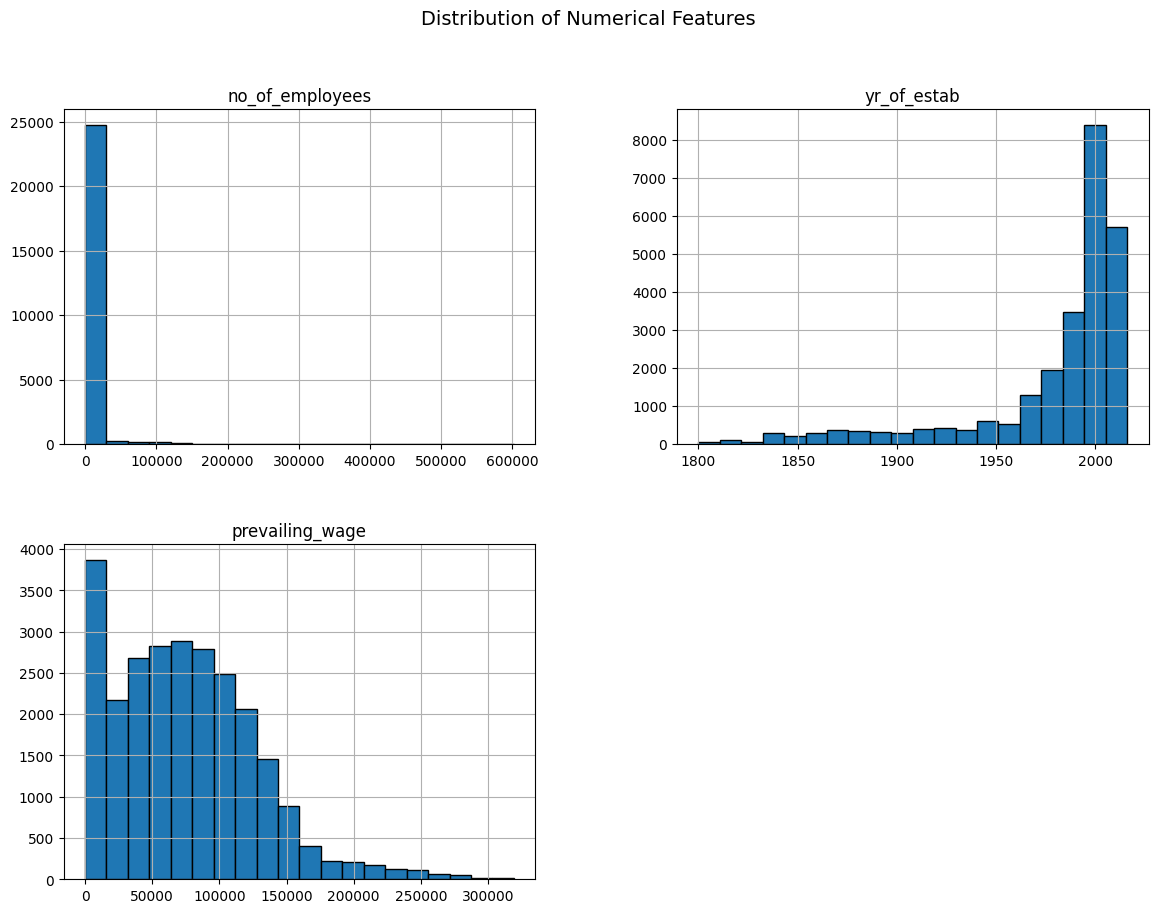

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


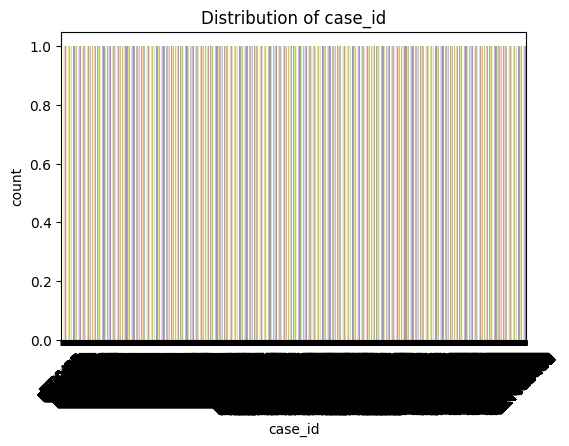

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


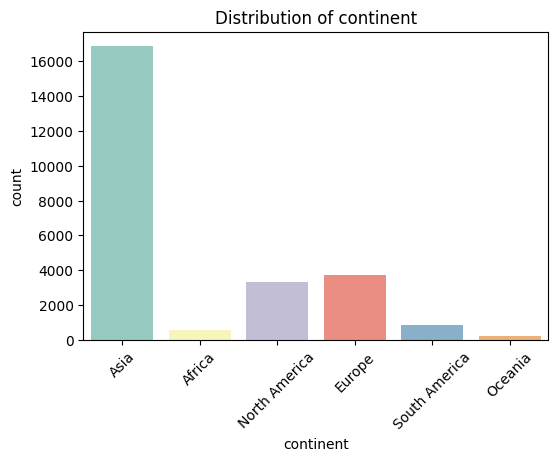

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


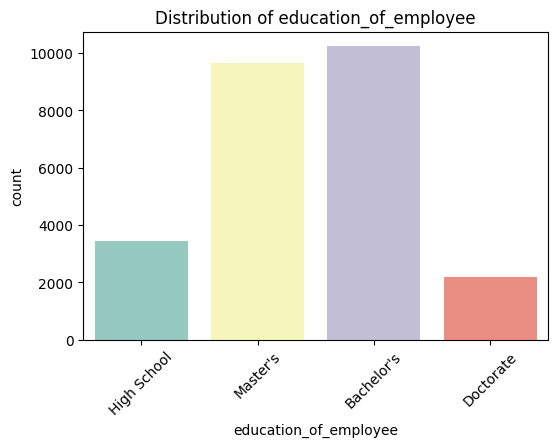

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


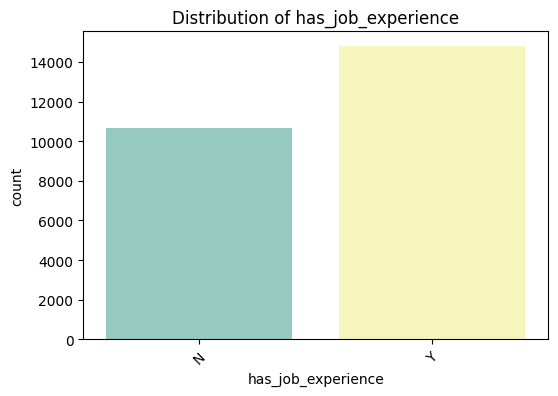

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


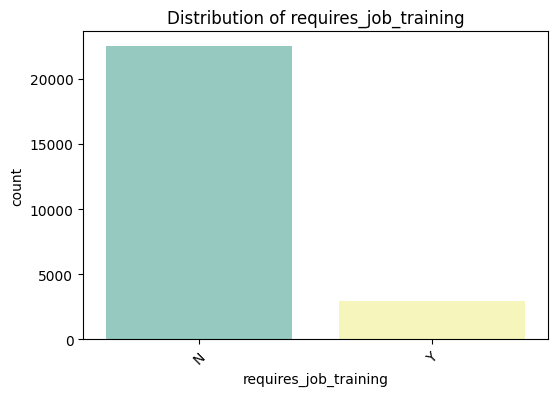

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


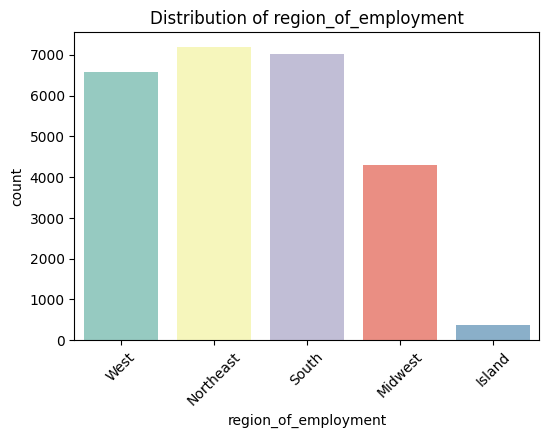

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


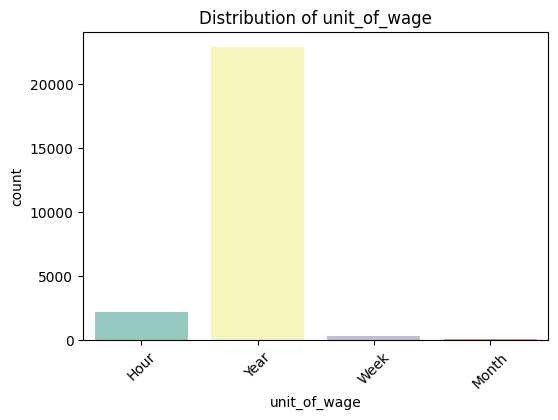

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


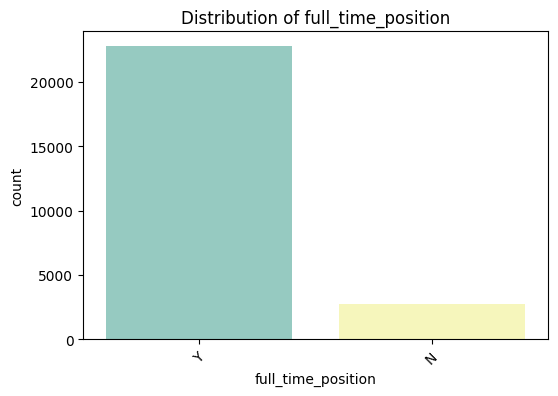

C:\Users\ncc333\AppData\Local\Temp\ipykernel_8664\116182077.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


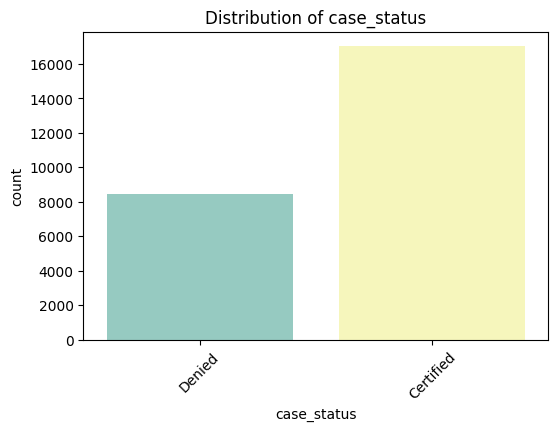


No target variable specified for relationship analysis.

 TASK 2.3: OUTLIER DETECTION & HANDLING 


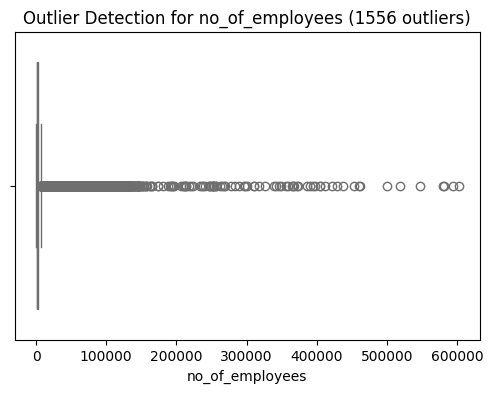

no_of_employees: 1556 outliers found.


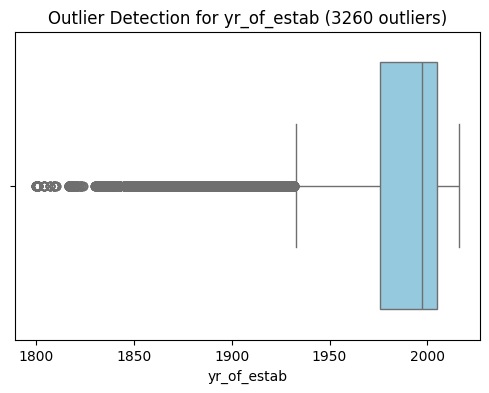

yr_of_estab: 3260 outliers found.


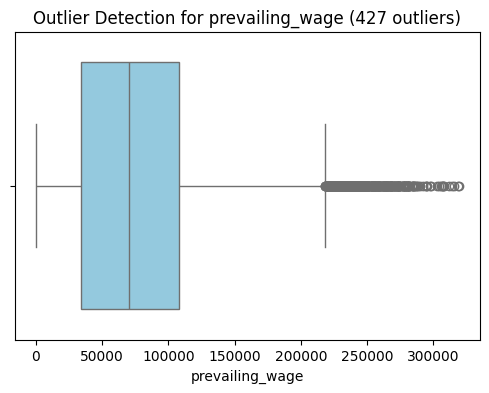

prevailing_wage: 427 outliers found.

 EDA Completed Successfully!


In [ ]:
df = load_eda(url)                                                   